In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering


data = pd.read_csv('/content/dataset2.csv')
data.head()



,Unnamed: 0,P1,P2,P3,P4,P5
0,P1,0.00,0.10,0.41,0.55,0.35
1,P2,0.10,0.00,0.64,0.47,0.98
2,P3,0.41,0.64,0.00,0.44,0.85
3,P4,0.55,0.47,0.44,0.00,0.76
4,P5,0.35,0.98,0.85,0.76,0.00


In [30]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



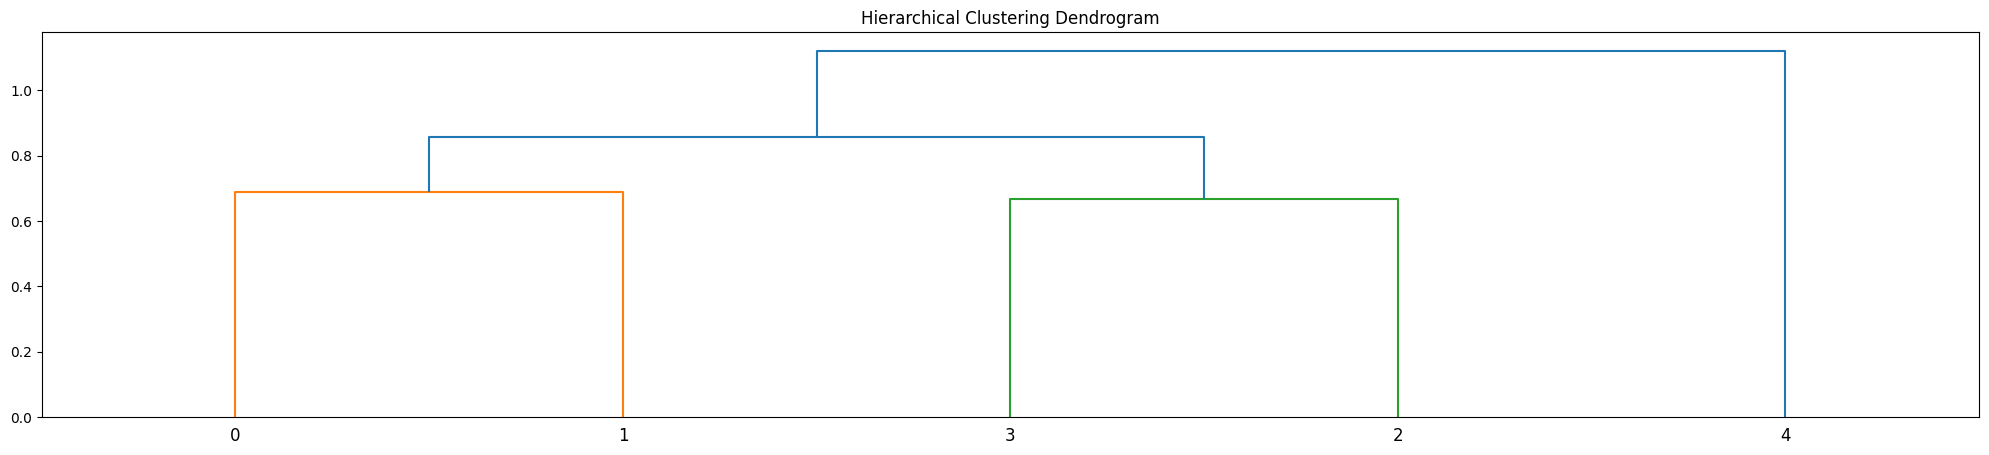

In [31]:
final_data = data[['P1' , 'P2', 'P3' , 'P4', 'P5']]

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None , linkage='single')

model = model.fit(final_data)
plt.figure(figsize=(25, 5))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)